<h1>
<hr style=" border:none; height:3px;">
<center>SHIA - Spotify Agent</center>
<hr style=" border:none; height:3px;">
</h1>

<center><img src='https://netacad.centralesupelec.fr/img/cs.jpg' width=200></center>

<h4><center>Louis LHOTTE | Ambroise MARTIN-ROUVILLE | Paul-Alexandre MARENGHI | Paul LE BELLOCH</center></h4>

# 0 - Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from torch import cosine_similarity
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import torch
import ast
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# I - Data Visualisation 

In [2]:
df = pd.read_csv('./Data/main_dataset.csv')
df.head(1)

,Unnamed: 0,artist,song,seeds,lyrics,lastfm_url,number_of_emotion_tags,valence_tags,arousal_tags,dominance_tags,genre
0,0,Eliza Doolittle,A Smokey Room,['quirky'],You got your hair in a do \r\nYea 'cause that'...,https://www.last.fm/music/eliza%2bdoolittle/_/...,1,6.43,4.35,5.82,pop


array([[<Axes: title={'center': 'valence_tags'}>,
        <Axes: title={'center': 'arousal_tags'}>],
       [<Axes: title={'center': 'dominance_tags'}>, <Axes: >]],
      dtype=object)

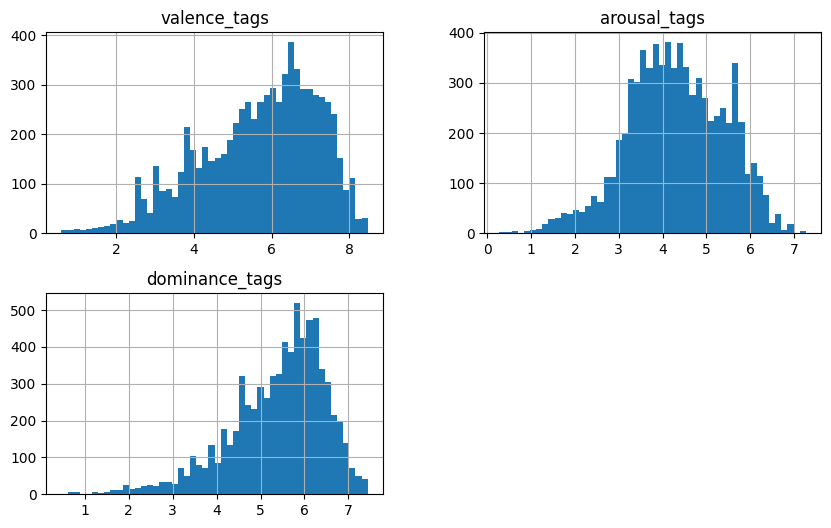

In [3]:
df[['valence_tags', 'arousal_tags', 'dominance_tags']].hist(bins=50, figsize=(10,6))

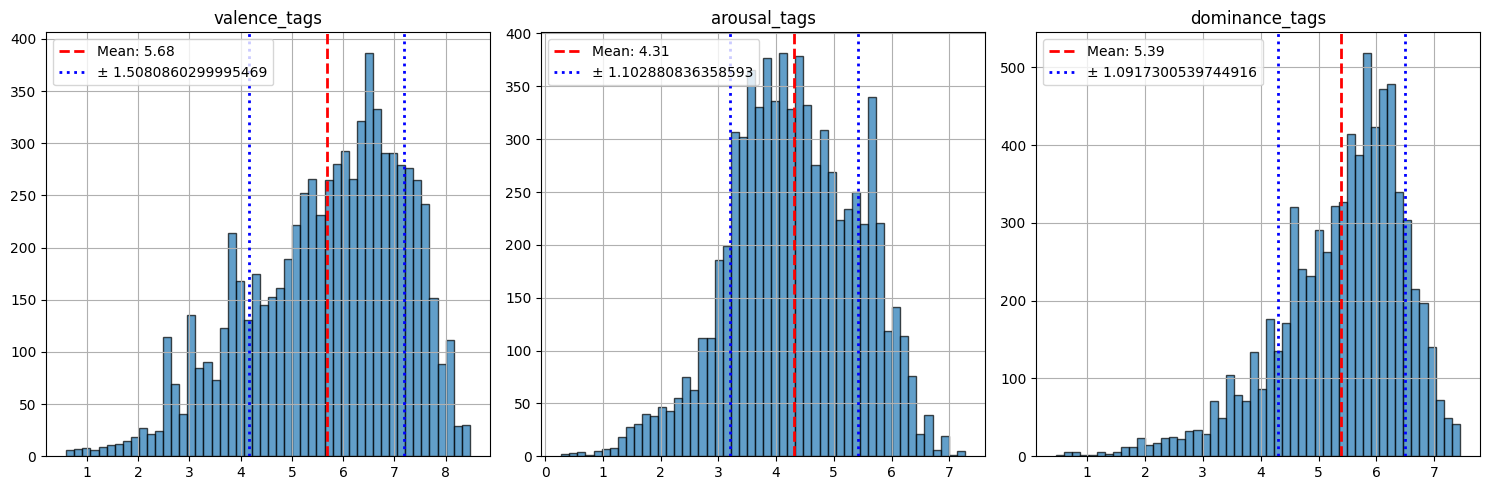

In [145]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

columns = ['valence_tags', 'arousal_tags', 'dominance_tags']

for i, col in enumerate(columns):
    ax = axes[i]
    df[col].hist(bins=50, ax=ax, alpha=0.7, edgecolor='black')
    
    # Calculating mean and variance
    mean_val = df[col].mean()
    var_val = df[col].var()
    
    # Plotting mean line
    ax.axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_val:.2f}')
    
    # Plotting variance range (mean ± sqrt(variance))
    ax.axvline(mean_val + var_val**0.5, color='blue', linestyle='dotted', linewidth=2, label=f'± ' + str(var_val**0.5))
    ax.axvline(mean_val - var_val**0.5, color='blue', linestyle='dotted', linewidth=2)
    
    ax.set_title(col)
    ax.legend()

plt.tight_layout()
plt.show()

<div class='alert alert-block alert-info'>The VAD values seem to follow a gaussian curve, making them very high-quality as there are no outliers</div>

# II - Model

In [4]:
df_res = pd.read_csv('./Data/VAD_scores.csv')
df_res.head(1)

,name,Valence,Arousal,Dominance
0,USER_1,4.5,3.0,6.5


In [5]:
df.head()

,Unnamed: 0,artist,song,seeds,lyrics,lastfm_url,number_of_emotion_tags,valence_tags,arousal_tags,dominance_tags,genre
0,0,Eliza Doolittle,A Smokey Room,['quirky'],You got your hair in a do \r\nYea 'cause that'...,https://www.last.fm/music/eliza%2bdoolittle/_/...,1,6.430000,4.350000,5.820000,pop
1,1,Elkie Brooks,Lilac Wine,"['theatrical', 'earnest']",I lost myself on a cool damp night\r\nGave mys...,https://www.last.fm/music/elkie%2bbrooks/_/lil...,4,4.648845,4.380120,4.926574,rock
2,2,Elkland,Apart,['joyous'],"You and I will never be apart, apart\r\nAnd yo...",https://www.last.fm/music/elkland/_/apart,1,7.450000,6.620000,6.250000,alternative
3,3,Ella Fitzgerald,"Bewitched, Bothered, And Bewildered","['smooth', 'sweet']",After one whole quart of brandy\r\nLike a dais...,https://www.last.fm/music/ella%2bfitzgerald/_/...,6,6.694444,3.440185,5.999630,jazz
4,4,Ella Fitzgerald,Love You Madly,['quiet'],Love you madly\r\nRight or wrong\r\nSounds lik...,https://www.last.fm/music/ella%2bfitzgerald/_/...,3,7.360000,4.143333,6.056667,jazz


In [7]:
mlb = MultiLabelBinarizer()
df['seeds'] = df['seeds'].apply(lambda x: eval(x) if isinstance(x, str) else x)  # Ensure lists are properly formatted
y = mlb.fit_transform(df['seeds'])

# Define feature matrix X
X = df[['valence_tags', 'arousal_tags', 'dominance_tags']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
df['seeds'][1]

['theatrical', 'earnest']

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier


model = make_pipeline(
    StandardScaler(),
    OneVsRestClassifier(RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42))
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred, target_names=mlb.classes_, output_dict=True)
report_df = pd.DataFrame(report).transpose()

y_pred = model.predict(X_test)

c:\Users\Louis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\multiclass.py:87: UserWarning: Label not 7 is present in all training examples.
  warnings.warn(
c:\Users\Louis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\multiclass.py:87: UserWarning: Label not 106 is present in all training examples.
  warnings.warn(
c:\Users\Louis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\multiclass.py:87: UserWarning: Label not 125 is present in all training examples.
  warnings.warn(
c:\Users\Louis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\multiclass.py:87: UserWarning: Label not 194 is present in all training examples.
  warnings.warn(
c:\Users\Louis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\multiclass.py:87: UserWarning: Label not 220 is present in all training examples.
  warnings.warn(
c:\Users\Louis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classificati

In [34]:
print(y_test[8])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]


In [33]:
print(y_pred[8])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]


In [22]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.20540540540540542


In [23]:
# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      0.34      0.51        29
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         0
           5       0.94      0.37      0.53        41
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00        38
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         9
          13       1.00      0.38      0.55        16
          14       1.00      0.03      0.06        32
          15       0.00      0.00      0.00         6
          16       0.00      0.00      0.00         2
          17       0.00    

c:\Users\Louis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Louis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Louis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mod

# Similarity Cosinus

In [140]:
def similarity(liste_vad, df, k):
    X = torch.tensor(df[['valence_tags', 'arousal_tags', 'dominance_tags']].values)
    user_input_x = torch.tensor(np.array(liste_vad).reshape(1, -3))
    similarities = cosine_similarity(X, user_input_x).flatten()
    df['Similarity'] = similarities
    df_sorted = df.sort_values(by='Similarity', ascending=False)
    dict = {}
    for i in range(k):
        for seed in df_sorted.head(k)['seeds'].values[i]:
            dict[seed] = 1 + dict.get(seed, 0)

    return df_sorted, dict

In [141]:
df, dict = similarity([4.5, 3.0, 6.5], df, 5)

In [142]:
print(dict)

{'lazy': 3, 'reflective': 2}


In [143]:
df.head()

,Unnamed: 0,artist,song,seeds,lyrics,lastfm_url,number_of_emotion_tags,valence_tags,arousal_tags,dominance_tags,genre,Similarity
1698,1698,Shivaree,Ash Wednesday,[lazy],Goodnight goodnight\r\nLeave all your toys\r\n...,https://www.last.fm/music/shivaree/_/ash%2bwed...,2,4.865,2.930,6.395,acoustic,0.999034
6224,6224,Joan Baez,Elvis Presley Blues,[lazy],I was thinking that night about Elvis\r\nDay t...,https://www.last.fm/music/joan%2bbaez/_/elvis%...,2,4.865,2.930,6.395,folk,0.999034
1148,1148,Joni Mitchell,In France They Kiss on Main Street,[lazy],Downtown\r\nMy darling dime store thief\r\nIn ...,https://www.last.fm/music/joni%2bmitchell/_/in...,2,4.105,3.150,5.670,folk,0.998001
6413,6413,Everlast,Weakness,[reflective],"Met a fine red boned mami, she told me that he...",https://www.last.fm/music/everlast/_/weakness,2,4.500,3.495,6.140,hip hop,0.997400
3951,3951,Dennis Wilson,Farewell My Friend,[reflective],Farewell my friend\r\nMy beautiful friend\r\nF...,https://www.last.fm/music/dennis%2bwilson/_/fa...,2,4.500,3.495,6.140,classic rock,0.997400


# Chat OpenAI Call